In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [48]:
mirai_data = pd.read_csv("/Users/daniel/Desktop/sideProjects/jacek/mirai_enriched_2018_07_03_2019.csv")

In [49]:
infected_ips = pd.read_csv("/Users/daniel/Desktop/sideProjects/jacek/results/all_infected_copy.csv")

In [50]:
mirai_data = mirai_data.drop_duplicates(subset=['ip'])
mirai_infected = mirai_data[mirai_data["ip"].isin(infected_ips["infected"])]

In [51]:
infected_group_by_country = mirai_infected.groupby(by=['country'])
infected_group_by_prefix = mirai_infected.groupby(by=['prefix'])
infected_group_by_asn = mirai_infected.groupby(by=['asn'])

In [52]:
mirai_count = infected_group_by_asn.count()

In [53]:
print(mirai_count.sort_values(by=['ip'], ascending=False).head(10))

          ip  honeypot  src_port  dst_port  protocol  tcp_flag  tcp_win_size  \
asn                                                                            
12389.0  547       547       547       547       547       547           547   
4837.0   388       388       388       388       388       388           388   
4134.0   362       362       362       362       362       362           362   
8452.0   227       227       227       227       227       227           227   
3462.0   138       138       138       138       138       138           138   
4766.0   108       108       108       108       108       108           108   
18403.0  103       103       103       103       103       103           103   
9121.0    96        96        96        96        96        96            96   
8376.0    85        85        85        85        85        85            85   
4760.0    72        72        72        72        72        72            72   

         fseen  lseen  count  aso  iso 

In [54]:
mirai_country_plot_data = mirai_count.sort_values(by=['ip'], ascending=False).iloc[:,0]

In [55]:
print(mirai_country_plot_data.head(5))

asn
12389.0    547
4837.0     388
4134.0     362
8452.0     227
3462.0     138
Name: ip, dtype: int64


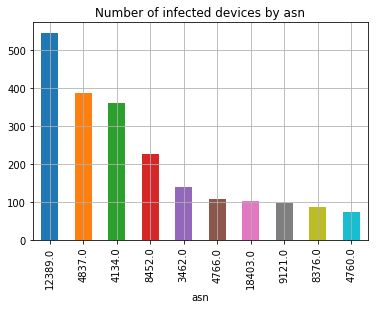

In [56]:
mirai_country_plot_data.head(10).plot(title="Number of infected devices by asn", grid=True, kind='bar')

In [57]:
import seaborn as sns


In [58]:
mirai_data["fseen"] = pd.to_datetime(mirai_data["fseen"], infer_datetime_format=False)
mirai_data["lseen"] = pd.to_datetime(mirai_data["lseen"], infer_datetime_format=False)


In [59]:
print(mirai_data['fseen'].head(5))

0   2019-03-07 23:59:22
1   2019-03-07 23:59:13
2   2019-03-07 23:59:03
3   2019-03-07 23:57:11
4   2019-03-07 23:56:34
Name: fseen, dtype: datetime64[ns]


In [60]:
print(mirai_data['lseen'].head(5))

0   2019-03-07 23:59:22
1   2019-03-07 23:59:13
2   2019-03-07 23:59:03
3   2019-03-07 23:57:11
4   2019-03-07 23:56:34
Name: lseen, dtype: datetime64[ns]


In [61]:
c_diff = pd.Series(mirai_data['lseen'] - mirai_data['fseen'], name="duration")

In [62]:
c_diff = c_diff.to_frame()
c_diff = c_diff.sort_values(by="duration",ascending=False)

print(c_diff.head(5))

               duration
65710 705 days 15:16:34
48459 671 days 03:43:55
91267 575 days 06:35:39
67265 569 days 06:03:21
88410 530 days 21:23:07


In [63]:
c_diff = c_diff[c_diff["duration"] != pd.Timedelta('0 days 00:00:00')]

In [64]:
c_diff.head(5)

,duration
65710,705 days 15:16:34
48459,671 days 03:43:55
91267,575 days 06:35:39
67265,569 days 06:03:21
88410,530 days 21:23:07


In [65]:
c_diff.describe()

,duration
count,15544
mean,13 days 01:35:25.251608
std,37 days 23:44:08.589192
min,0 days 00:00:01
25%,0 days 00:28:37.750000
50%,1 days 04:36:11.500000
75%,8 days 07:55:08.250000
max,705 days 15:16:34


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

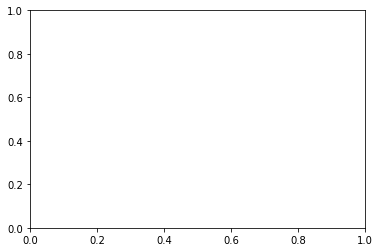

In [66]:
c_diff.fillna(pd.Timedelta('0 days 00:00:00')).plot.kde()

Text(0.5, 0, 'Active in hours')

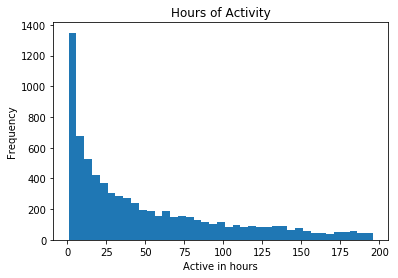

In [42]:
(c_diff["duration"] / pd.Timedelta(hours=1)).plot(kind="hist",title="Hours of Activity",bins=range(1, 200, 5)).set_xlabel("Active in hours")

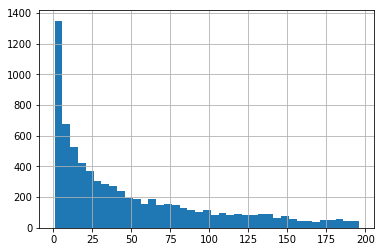

In [71]:
(_c_diff["time"] / pd.Timedelta(hours=1)).hist(bins=range(1, 200, 5)) 

In [ ]:
(c_diff["duration"] / pd.Timedelta(hours=1)).plot.kde()

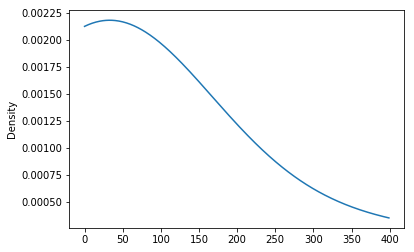

In [69]:
(c_diff["duration"] / pd.Timedelta(hours=1)).plot.kde(ind=range(0,400,1))

In [68]:
t = [("key1", 4), ("key2", 8)]

In [69]:
_t = pd.DataFrame(t)

In [70]:
_t.columns = ["key", "value"]

In [71]:
_t

,key,value
0,key1,4
1,key2,8


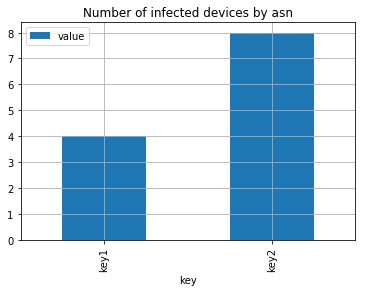

In [76]:
_t.plot(title="Number of infected devices by asn", x="key", grid=True, kind='bar', legend=True)